# Karimnagar Heatwave Prediction: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler

2023-03-03 23:40:18.203617: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 23:40:18.868342: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-03 23:40:18.868396: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-03 23:40:18.868403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

## Loading Datasets and Preprocessing: 

In [2]:
db19 = pd.read_csv("./Datasets/2019")
db20 = pd.read_csv("./Datasets/2020")
db21 = pd.read_csv("./Datasets/2021.csv")
db22 = pd.read_csv("./Datasets/2022.csv")
db_soil = pd.read_csv("./Datasets/soil.csv")

In [3]:
db19.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2


In [4]:
db20.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2020-01-01,6.8,16.4,25.8,62.2,96.2,3.2,0.0
1,1,Adilabad,Bheempoor,2020-01-02,0.0,17.1,27.7,65.4,94.8,2.1,0.0
2,2,Adilabad,Bheempoor,2020-01-03,25.8,16.9,22.2,85.6,96.9,1.1,0.0
3,3,Adilabad,Bheempoor,2020-01-04,0.0,15.1,23.0,79.5,98.3,1.4,0.0
4,4,Adilabad,Bheempoor,2020-01-05,0.0,13.2,25.7,63.5,98.2,0.7,0.0


In [5]:
db21.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2021-01-01 00:00:00,0.0,10.1,30.0,37.8,95.7,3.1,0.0
1,1,Adilabad,Bheempoor,2021-01-02 00:00:00,0.0,11.7,29.9,40.6,96.6,2.2,0.0
2,2,Adilabad,Bheempoor,2021-01-03 00:00:00,0.0,10.4,30.4,45.8,97.0,2.2,0.0
3,3,Adilabad,Bheempoor,2021-01-04 00:00:00,0.0,13.1,30.5,38.4,96.4,2.0,0.0
4,4,Adilabad,Bheempoor,2021-01-05 00:00:00,0.0,13.4,29.8,50.7,97.0,2.0,0.0


In [6]:
db21_1 = db21.iloc[:53010]
db21_2 = db21.iloc[53010:]

db21_1.Date = pd.to_datetime(db21_1.Date,format="%Y-%m-%d")
db21_2.Date = pd.to_datetime(db21_2.Date,format="%d-%b-%y")
db21 = pd.concat((db21_1,db21_2))
db21

/tmp/ipykernel_19548/56031398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db21_1.Date = pd.to_datetime(db21_1.Date,format="%Y-%m-%d")
/tmp/ipykernel_19548/56031398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db21_2.Date = pd.to_datetime(db21_2.Date,format="%d-%b-%y")


,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2021-01-01,0.0,10.1,30.0,37.8,95.7,3.1,0.0
1,1,Adilabad,Bheempoor,2021-01-02,0.0,11.7,29.9,40.6,96.6,2.2,0.0
2,2,Adilabad,Bheempoor,2021-01-03,0.0,10.4,30.4,45.8,97.0,2.2,0.0
3,3,Adilabad,Bheempoor,2021-01-04,0.0,13.1,30.5,38.4,96.4,2.0,0.0
4,4,Adilabad,Bheempoor,2021-01-05,0.0,13.4,29.8,50.7,97.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225522,225522,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-27,0.0,18.5,31.0,45.1,93.5,4.0,0.0
225523,225523,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-28,0.0,17.1,29.0,46.5,91.8,5.6,0.0
225524,225524,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-29,0.0,16.5,29.8,45.2,92.3,8.1,0.0
225525,225525,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-30,0.0,17.5,30.0,43.9,90.8,8.2,0.0


In [7]:
db22.head()

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,Adilabad,Adilabad Rural,01-Jan-22,0.0,14.1,23.8,72.6,99.5,0.0,7.1
1,Adilabad,Adilabad Rural,02-Jan-22,0.0,13.5,27.4,55.6,99.8,0.0,8.0
2,Adilabad,Adilabad Rural,03-Jan-22,0.0,12.9,28.4,44.7,99.0,0.0,7.9
3,Adilabad,Adilabad Rural,04-Jan-22,0.0,12.7,27.6,49.5,99.0,0.0,9.7
4,Adilabad,Adilabad Rural,05-Jan-22,0.0,12.5,28.5,41.9,97.7,0.0,9.5


In [8]:
db22.Date = pd.to_datetime(db22.Date,format="%d-%b-%y")

In [9]:
db22

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,Adilabad,Adilabad Rural,2022-01-01,0.0,14.1,23.8,72.6,99.5,0.0,7.1
1,Adilabad,Adilabad Rural,2022-01-02,0.0,13.5,27.4,55.6,99.8,0.0,8.0
2,Adilabad,Adilabad Rural,2022-01-03,0.0,12.9,28.4,44.7,99.0,0.0,7.9
3,Adilabad,Adilabad Rural,2022-01-04,0.0,12.7,27.6,49.5,99.0,0.0,9.7
4,Adilabad,Adilabad Rural,2022-01-05,0.0,12.5,28.5,41.9,97.7,0.0,9.5
...,...,...,...,...,...,...,...,...,...,...
162157,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-26,0.0,23.1,35.6,55.4,99.0,0.0,2.0
162158,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-27,2.9,22.8,37.0,53.7,99.2,0.0,1.2
162159,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-28,0.0,23.8,35.3,74.6,99.0,0.0,8.7
162160,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-29,29.1,21.3,33.8,67.4,99.5,0.0,6.5


In [10]:
db = pd.concat((db19,db20,db21,db22))
# db = pd.concat((db19,db20))
db.drop("Unnamed: 0",axis=1,inplace=True)
db.Date = pd.to_datetime(db.Date,format = "%Y-%m-%d")

In [11]:
db

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2
...,...,...,...,...,...,...,...,...,...,...
162157,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-26,0.0,23.1,35.6,55.4,99.0,2.0,0.0
162158,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-27,2.9,22.8,37.0,53.7,99.2,1.2,0.0
162159,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-28,0.0,23.8,35.3,74.6,99.0,8.7,0.0
162160,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-29,29.1,21.3,33.8,67.4,99.5,6.5,0.0


In [12]:
db.head()

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2


In [13]:
krm = db[db.District == "Karimnagar"]
krm

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
19980,Karimnagar,Chigurumamidi,2019-01-01,0.0,9.1,27.5,23.0,60.3,0.0,7.7
19981,Karimnagar,Chigurumamidi,2019-01-02,0.0,9.7,28.5,20.2,78.5,0.0,0.1
19982,Karimnagar,Chigurumamidi,2019-01-03,0.0,12.3,31.0,20.4,89.7,0.0,0.1
19983,Karimnagar,Chigurumamidi,2019-01-04,0.0,10.6,30.8,21.8,90.6,0.0,1.5
19984,Karimnagar,Chigurumamidi,2019-01-05,0.0,14.7,30.7,26.0,90.6,0.0,7.5
...,...,...,...,...,...,...,...,...,...,...
149197,Karimnagar,Veenavanka,2022-09-26,0.0,27.3,36.5,41.0,91.7,9.0,0.0
149198,Karimnagar,Veenavanka,2022-09-27,0.0,27.6,35.6,49.4,92.7,7.4,0.0
149199,Karimnagar,Veenavanka,2022-09-28,0.0,28.0,34.5,62.7,77.3,5.2,0.0
149200,Karimnagar,Veenavanka,2022-09-29,0.0,27.5,36.1,58.4,91.4,8.1,0.0


In [14]:
krm.Mandal.unique()

array(['Chigurumamidi', 'Choppadandi', 'Ellandakunta', 'Gangadhara',
       'Gannervaram', 'Huzurabad', 'Jammikunta', 'Jammikunta ',
       'Karimnagar', 'Karimnagar Rural', 'Kothapalle', 'Manakondur',
       'Manakondur ', 'Ramadugu', 'Shankarapatnam', 'Thimmapur',
       'V Saidapur', 'Veenavanka', 'Karimnagar_Rural', 'V_Saidapur'],
      dtype=object)

In [15]:
krm.Mandal = krm.Mandal.transform(lambda x : x.strip())

/tmp/ipykernel_19548/794930050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  krm.Mandal = krm.Mandal.transform(lambda x : x.strip())


In [16]:
krm.Mandal.unique()

array(['Chigurumamidi', 'Choppadandi', 'Ellandakunta', 'Gangadhara',
       'Gannervaram', 'Huzurabad', 'Jammikunta', 'Karimnagar',
       'Karimnagar Rural', 'Kothapalle', 'Manakondur', 'Ramadugu',
       'Shankarapatnam', 'Thimmapur', 'V Saidapur', 'Veenavanka',
       'Karimnagar_Rural', 'V_Saidapur'], dtype=object)

In [17]:
krm.Mandal = krm.Mandal.transform(lambda x : "Gudihathnur" if x=="Gudihathnoor" or x=="Gudihatnoor" else ("Adilabad Urban" if x=="Adilabad (Urban)" else x)) 

/tmp/ipykernel_19548/344611722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  krm.Mandal = krm.Mandal.transform(lambda x : "Gudihathnur" if x=="Gudihathnoor" or x=="Gudihatnoor" else ("Adilabad Urban" if x=="Adilabad (Urban)" else x))


In [18]:
krm.Mandal.unique()

array(['Chigurumamidi', 'Choppadandi', 'Ellandakunta', 'Gangadhara',
       'Gannervaram', 'Huzurabad', 'Jammikunta', 'Karimnagar',
       'Karimnagar Rural', 'Kothapalle', 'Manakondur', 'Ramadugu',
       'Shankarapatnam', 'Thimmapur', 'V Saidapur', 'Veenavanka',
       'Karimnagar_Rural', 'V_Saidapur'], dtype=object)

In [19]:
krm

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
19980,Karimnagar,Chigurumamidi,2019-01-01,0.0,9.1,27.5,23.0,60.3,0.0,7.7
19981,Karimnagar,Chigurumamidi,2019-01-02,0.0,9.7,28.5,20.2,78.5,0.0,0.1
19982,Karimnagar,Chigurumamidi,2019-01-03,0.0,12.3,31.0,20.4,89.7,0.0,0.1
19983,Karimnagar,Chigurumamidi,2019-01-04,0.0,10.6,30.8,21.8,90.6,0.0,1.5
19984,Karimnagar,Chigurumamidi,2019-01-05,0.0,14.7,30.7,26.0,90.6,0.0,7.5
...,...,...,...,...,...,...,...,...,...,...
149197,Karimnagar,Veenavanka,2022-09-26,0.0,27.3,36.5,41.0,91.7,9.0,0.0
149198,Karimnagar,Veenavanka,2022-09-27,0.0,27.6,35.6,49.4,92.7,7.4,0.0
149199,Karimnagar,Veenavanka,2022-09-28,0.0,28.0,34.5,62.7,77.3,5.2,0.0
149200,Karimnagar,Veenavanka,2022-09-29,0.0,27.5,36.1,58.4,91.4,8.1,0.0


In [20]:
len(krm.Date.unique())

1368

In [21]:
krm = krm.groupby("Date").mean().sort_index()
krm["Date"] = krm.index
krm.index = np.arange(len(krm))
krm

/tmp/ipykernel_19548/2877969915.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  krm = krm.groupby("Date").mean().sort_index()


,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph),Date
0,0.00000,11.196296,28.340741,23.688889,85.877778,0.125926,5.770370,2019-01-01
1,0.00000,11.670370,30.177778,23.288889,90.755556,0.022222,5.562963,2019-01-02
2,0.00000,13.922222,31.696296,24.603704,90.174074,0.000000,4.392593,2019-01-03
3,0.00000,13.188889,31.611111,28.974074,93.788889,0.000000,4.762963,2019-01-04
4,0.00000,15.177778,31.800000,30.448148,95.922222,0.000000,6.359259,2019-01-05
...,...,...,...,...,...,...,...,...
1363,0.00000,23.712500,33.468750,58.362500,97.518750,7.720000,0.000000,2022-09-26
1364,3.58125,23.918750,33.581250,63.506250,97.112500,6.037500,0.000000,2022-09-27
1365,0.00000,24.600000,32.456250,70.862500,96.668750,5.512500,0.000000,2022-09-28
1366,3.43125,23.950000,33.437500,67.543750,97.468750,7.281250,0.000000,2022-09-29


/tmp/ipykernel_19548/603052727.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(krm.corr(),annot=True)


<AxesSubplot: >

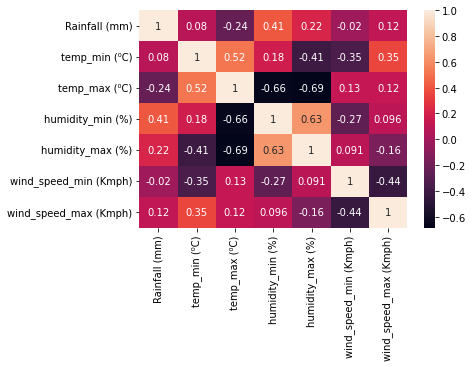

In [22]:
# plt.figure(figsize=(15,15))
sns.heatmap(krm.corr(),annot=True)

In [23]:
krm.drop(["wind_speed_min (Kmph)","wind_speed_max (Kmph)"],axis=1,inplace=True)
krm.fillna(method="ffill",inplace=True)

In [24]:
krm

,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),Date
0,0.00000,11.196296,28.340741,23.688889,85.877778,2019-01-01
1,0.00000,11.670370,30.177778,23.288889,90.755556,2019-01-02
2,0.00000,13.922222,31.696296,24.603704,90.174074,2019-01-03
3,0.00000,13.188889,31.611111,28.974074,93.788889,2019-01-04
4,0.00000,15.177778,31.800000,30.448148,95.922222,2019-01-05
...,...,...,...,...,...,...
1363,0.00000,23.712500,33.468750,58.362500,97.518750,2022-09-26
1364,3.58125,23.918750,33.581250,63.506250,97.112500,2022-09-27
1365,0.00000,24.600000,32.456250,70.862500,96.668750,2022-09-28
1366,3.43125,23.950000,33.437500,67.543750,97.468750,2022-09-29


### Scaling the Data: 

In [25]:
n = StandardScaler()
n1 = StandardScaler()
dates = krm.Date
cols = krm.columns
ind = krm.index

for i in krm:
    if i!="temp_max (⁰C)" and i!="Date":
        krm[i] = n.fit_transform(krm[i].values.reshape(-1,1))
    elif i!="Date":
        n1.fit(krm[i].values.reshape(-1,1))
        krm[i]=n1.transform(krm[i].values.reshape(-1,1))
        
krm["Day"] = krm.Date.dt.day
krm["Month"] = krm.Date.dt.month
krm["Year"] = krm.Date.dt.year
krm.drop("Date",axis=1,inplace=True)
krm

,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),Day,Month,Year
0,-0.332204,-2.681217,-1.392335,-1.234957,-0.272224,1,1,2019
1,-0.332204,-2.568110,-0.935324,-1.254191,0.114227,2,1,2019
2,-0.332204,-2.030851,-0.557553,-1.190970,0.068158,3,1,2019
3,-0.332204,-2.205814,-0.578745,-0.980830,0.354549,4,1,2019
4,-0.332204,-1.731293,-0.531754,-0.909952,0.523566,5,1,2019
...,...,...,...,...,...,...,...,...
1363,-0.332204,0.304968,-0.116610,0.432253,0.650054,26,9,2022
1364,-0.028935,0.354176,-0.088622,0.679580,0.617868,27,9,2022
1365,-0.332204,0.516713,-0.368495,1.033290,0.582711,28,9,2022
1366,-0.041637,0.361632,-0.124384,0.873715,0.646093,29,9,2022


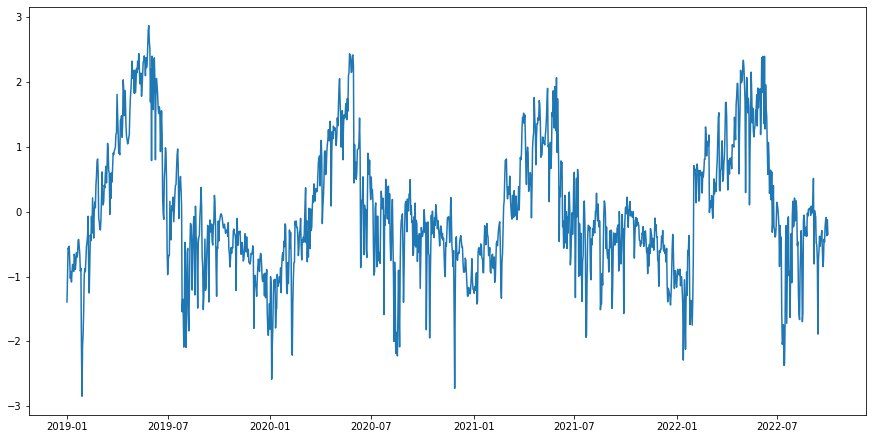

In [26]:
plt.figure(figsize=(15,7.5))
plt.plot(dates,krm["temp_max (⁰C)"])

## Seasonal Decompose: 

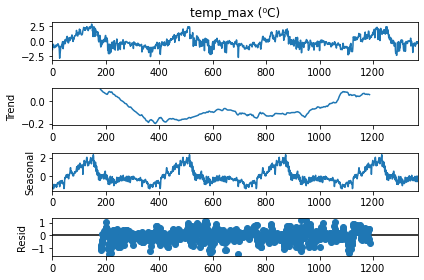

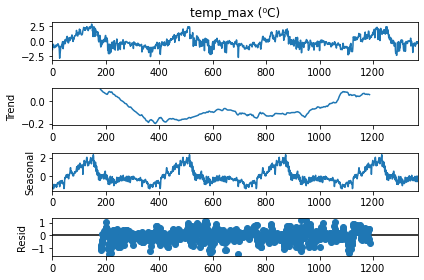

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose


r = seasonal_decompose(krm["temp_max (⁰C)"],model='additive',period=360)
r.plot()

In [28]:
len(krm)

1368

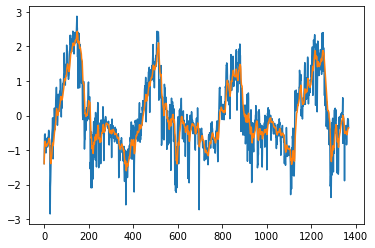

In [29]:
krm["temp_max (⁰C)"].plot()
krm["temp_max (⁰C)"].ewm(span=14).mean().plot()

krm["temp_max (⁰C)"] = krm["temp_max (⁰C)"].ewm(span=39).mean()

## Time Series Forecasting: 

In [30]:
def series_gen(db,label,window=360,lead=360):
    X = db.values
    y = db[label].values

    X_,y_ = [],[]

    for i in range(len(db)-window-lead):
        row = [r for r in X[i:i+window]]
        X_.append(row)
        y_.append(y[i+window:i+window+lead])

    return np.array(X_),np.array(y_)

In [31]:
X,y = series_gen(krm,"temp_max (⁰C)")

In [32]:
X.shape,y.shape

((648, 360, 8), (648, 360))

In [33]:
y

array([[-0.9532984 , -1.00101032, -1.0350316 , ..., -0.64710643,
        -0.67126968, -0.70277643],
       [-1.00101032, -1.0350316 , -1.05410968, ..., -0.67126968,
        -0.70277643, -0.73278559],
       [-1.0350316 , -1.05410968, -1.09197396, ..., -0.70277643,
        -0.73278559, -0.7545307 ],
       ...,
       [-0.40456641, -0.37306522, -0.35309014, ..., -0.43493342,
        -0.41901723, -0.40249749],
       [-0.37306522, -0.35309014, -0.34740777, ..., -0.41901723,
        -0.40249749, -0.40079737],
       [-0.35309014, -0.34740777, -0.32910426, ..., -0.40249749,
        -0.40079737, -0.3869767 ]])

In [34]:
testx,testy = X[-360:],y[-360:]

lead = 30

trainx,trainy = X[:-360-lead],y[:-360-lead]
valx,valy = X[-360-lead:-360],y[-360-lead:-360]

In [35]:
trainx.shape

(258, 360, 8)

### LSTM Model 

In [137]:
model = Sequential()
model.add(InputLayer((X.shape[1],X.shape[2])))
model.add(LSTM(128))
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(y.shape[1]))

model.compile(loss=MeanSquaredError(),metrics=RootMeanSquaredError(),optimizer=Adam(learning_rate=0.0001))

model.summary()

model.fit(trainx,trainy,validation_data=(valx,valy),epochs=500)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               70144     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 360)               23400     
                                                                 
Total params: 118,376
Trainable params: 118,376
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
9/9 [==============================]

In [36]:
model = tf.keras.models.load_model("./Models/Karimnagar")

2023-03-03 23:40:23.795961: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 23:40:23.812330: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 23:40:23.812525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 23:40:23.812938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [37]:
pred = model.predict(testx)

2023-03-03 23:40:26.597955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8800


12/12 [==============================] - 2s 5ms/step


2023-03-03 23:40:27.206216: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [38]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(testy,pred)

1.2304182155385939

In [39]:
pred_plot = n1.inverse_transform(pred[:,0].reshape(-1,1)).T[0]
test_plot = n1.inverse_transform(testy[:,0].reshape(-1,1)).T[0]

### Test Forecast: 

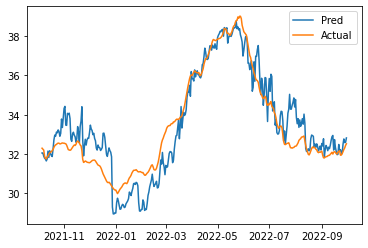

In [40]:
plt.plot(dates[-360:],pred_plot)
plt.plot(dates[-360:],test_plot)
plt.legend(["Pred","Actual"])
# plt.vlines(dates.iloc[-200],-2,2,'r')

12/12 [==============================] - 0s 5ms/step


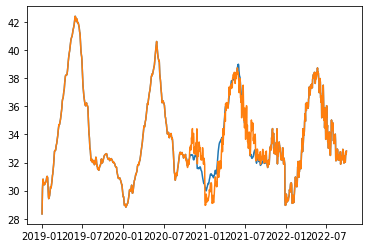

In [41]:
plt.plot(dates,np.concatenate((n1.inverse_transform(X[:,0,2].reshape(-1,1)).T[0],test_plot,n1.inverse_transform(model.predict(X[-360:])[:,0].reshape(-1,1)).T[0])))
plt.plot(dates,np.concatenate((n1.inverse_transform(X[:,0,2].reshape(-1,1)).T[0],pred_plot,n1.inverse_transform(model.predict(X[-360:])[:,0].reshape(-1,1)).T[0])))

In [42]:
model.save("./Models/Karimnagar")

INFO:tensorflow:Assets written to: ./Models/Karimnagar/assets


INFO:tensorflow:Assets written to: ./Models/Karimnagar/assets


In [43]:
from sklearn.metrics import mean_squared_error

# mean_squared_error(testy,pred)
rmfse = np.sqrt(mean_squared_error(pred,testy))
rmfse

0.5431954038537201

### Plotting with Prediction Interval: 

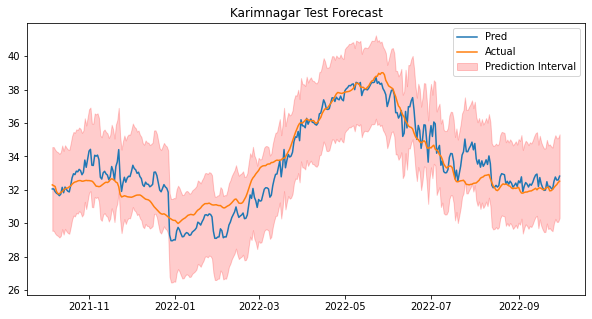

In [44]:
from scipy.stats import t

a = 0.01

n = len(pred_plot)

t_ = t.ppf(1-a/2, df=len(pred_plot)-2)

x = np.arange(len(pred_plot))
x_ = np.mean(x)

interval = t_ * np.sqrt((np.square(pred_plot-test_plot).sum()/(n-2)) * (1+(1/n)+(np.square(x-x_)/np.square(x-x_).sum())))

plt.figure(figsize=(10,5))
plt.plot(dates[-360:],pred_plot)
plt.plot(dates[-360:],test_plot)
plt.fill_between(dates[-360:],pred_plot+interval,pred_plot-interval,color='red',alpha=0.2)

plt.title("Karimnagar Test Forecast")
plt.legend(["Pred","Actual","Prediction Interval"])

In [45]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(pred_plot,test_plot)

0.02309423786088746

## Predicting Heatwaves using Temperature Forecast

In [46]:
db_ = db[db.District=="Karimnagar"].groupby("Date").mean().resample("W").mean()
db_["Date"] = db_.index

md = db_.Date.dt.strftime("%W")

db_ = db_.groupby(md, sort=False)['temp_max (⁰C)'].mean().reset_index()

/tmp/ipykernel_19548/2666787628.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db_ = db[db.District=="Karimnagar"].groupby("Date").mean().resample("W").mean()


In [47]:
ft = model.predict(X[-360:])
ft_plot = n1.inverse_transform(ft[:,0].reshape(-1,1)).T[0]

12/12 [==============================] - 0s 5ms/step


In [48]:
pred_db = pd.DataFrame()
pred_db["Date"] = pd.date_range("2022-09-30",periods=360)
pred_db["Temp"] = ft_plot
pred_db["WeekNo"] = pred_db.Date.dt.strftime("%W")
pred_db["Upper_Limit"] = pred_db["Temp"].values + interval
pred_db["Lower_Limit"] = pred_db["Temp"].values - interval
pred_db["Deviation"] = [ np.float64(i-db_[db_.Date==str(j)]["temp_max (⁰C)"].values) for i,j in pred_db.loc[:,["Upper_Limit","WeekNo"]].values]
pred_db["HeatWave"] = [2 if (pred_db.iloc[i,:]["Deviation"]>7 or pred_db.iloc[i,:]["Temp"]>=47) else (1 if (pred_db.iloc[i,:]["Deviation"]>5 or pred_db.iloc[i,:]["Temp"]>=45) else 0 ) for i in range(len(pred_db))]
pred_db[pred_db.HeatWave!=0]

/tmp/ipykernel_19548/136357867.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pred_db["HeatWave"] = [2 if (pred_db.iloc[i,:]["Deviation"]>7 or pred_db.iloc[i,:]["Temp"]>=47) else (1 if (pred_db.iloc[i,:]["Deviation"]>5 or pred_db.iloc[i,:]["Temp"]>=45) else 0 ) for i in range(len(pred_db))]


,Date,Temp,WeekNo,Upper_Limit,Lower_Limit,Deviation,HeatWave
73,2022-12-12,33.061787,50,35.557919,30.565654,5.585672,1
74,2022-12-13,32.852749,50,35.348813,30.356684,5.376566,1
80,2022-12-19,32.171963,51,34.667635,29.676291,5.445016,1
81,2022-12-20,32.093849,51,34.589458,29.598241,5.366839,1
82,2022-12-21,31.860205,51,34.355751,29.364659,5.133132,1
270,2023-06-27,36.055809,26,38.550935,33.560683,5.186314,1
271,2023-06-28,35.947109,26,38.442293,33.451925,5.077673,1
292,2023-07-19,35.034275,29,37.530827,32.537723,5.721786,1
295,2023-07-22,34.477360,29,36.974130,31.980590,5.165089,1
296,2023-07-23,34.630379,29,37.127223,32.133535,5.318182,1


In [49]:
pred_db.to_csv("./Heatwave Predictions/Karimnagar.csv")